In [1]:
%matplotlib widget
#%matplotlib inline

In [2]:
# use standard rayoptics environment
from rayoptics.environment import *

import ipywidgets as widgets

In [3]:
import rayoptics.seq.twoconicmirrors as tcm

def apply_conics(opt_model, fct, parax_model):
    cc_m1, cc_m2 = fct(parax_model)
    opt_model.seq_model.ifcs[1].profile.cc = cc_m1
    opt_model.seq_model.ifcs[2].profile.cc = cc_m2
    opt_model.update_model()

In [4]:
root_pth = Path(rayoptics.__file__).resolve().parent

# Create a new model

In [5]:
app = AppManager(opm:=OpticalModel())

In [6]:
#opm = app.model = OpticalModel()

sm  = opm['seq_model']
osp = opm['optical_spec']
pm = opm['parax_model']
em = opm['ele_model']
pt = opm['part_tree']
ar = opm['analysis_results']
print(f"{opm.ro_version=}")

opm.ro_version='0.9.5'


## Define first order aperture and field for system

In [7]:
osp.pupil = PupilSpec(osp, key=['image', 'f/#'], value=10.)
osp.field_of_view = FieldSpec(osp, key=['image', 'height'], flds=[0., 0.5])

## Define interface and gap data for the sequential model

In [8]:
sm.gaps[0].thi=1e10

In [9]:
opm.add_mirror(label='M1', profile=Conic, c=-0.01, t=-33.)
opm.add_mirror(label='M2', profile=Conic, c=-0.01, t=50.)

## Update the model

In [10]:
opm.update_model()

In [11]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1  4.3103e+07
    1:    -0.010000     -33.0000       air    reflect -1      3.7882
    2:    -0.010000      50.0000       air    reflect  1      1.4298
  Img:     0.000000      0.00000                       1      1.7187


In [12]:
pt.list_model()

root
├── Object
├── M1
├── M2
└── Image


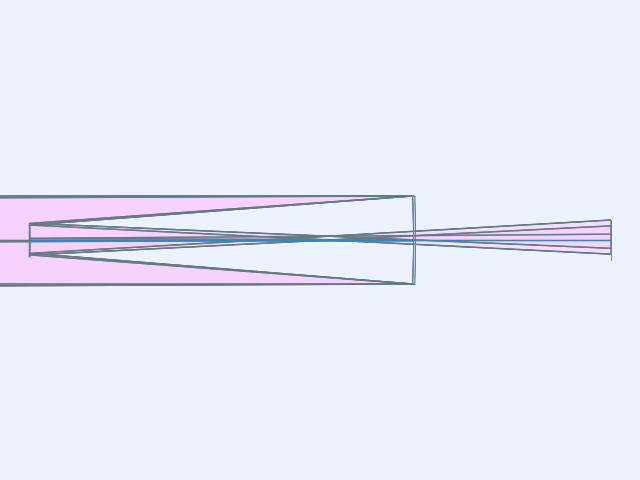

In [13]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

## Build the paraxial model and list

In [14]:
pm.list_model()

           ax_ht        pr_ht       ax_slp       pr_slp         power          tau        index    type
 0:            0 -4.31034e+07  3.78788e-10   0.00431034             0        1e+10      1.00000    dummy
 1:      3.78788            0   -0.0757576   0.00431034          0.02           33     -1.00000    reflect
 2:      1.28788     0.142241        -0.05   0.00715517         -0.02           50      1.00000    reflect
 3:     -1.21212          0.5        -0.05   0.00715517             0            0      1.00000    dummy


In [15]:
pm.first_order_data()

efl               75.76
f                 75.76
f'                75.76
ffl              -125.8
pp1                 -50
bfl               25.76
ppk                 -50
pp sep              -33
f/#                  10
m            -7.576e-09
red           -1.32e+08
obj_dist          1e+10
obj_ang           0.247
enp_dist             -0
enp_radius        3.788
na obj        3.788e-10
n obj                 1
img_dist          25.76
img_ht           0.3265
exp_dist         -44.12
exp_radius        2.282
na img            -0.05
n img                 1
optical invariant      0.01633


In [16]:
opm.save_model('TwoMirror')

In [17]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1  4.3103e+07
    1:    -0.010000     -33.0000       air    reflect -1      3.7882
    2:    -0.010000      50.0000       air    reflect  1      1.4298
  Img:     0.000000      0.00000                       1      1.7187


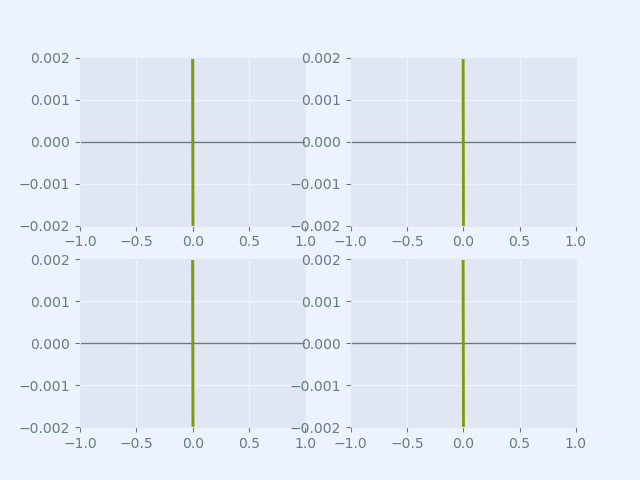

In [18]:
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray',
                     scale_type=Fit.User_Scale, user_scale_value=0.002).plot()

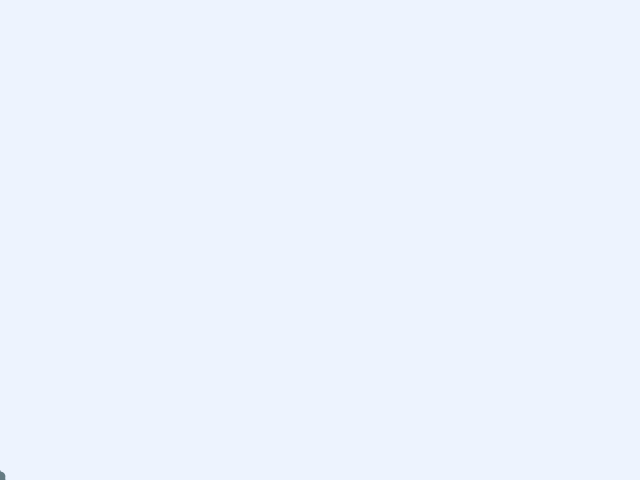

In [19]:
yybar_plt = plt.figure(FigureClass=InteractiveDiagram, opt_model=opm, dgm_type='ht')
def refresh_yybar():
    opm.update_model()
    yybar_plt.refresh()
    return yybar_plt

yybar_plt.refresh_gui=refresh_yybar

In [20]:
vertex=3
pm.apply_ht_dgm_data(vertex, (0.5, 0.0))
pm.paraxial_lens_to_seq_model()

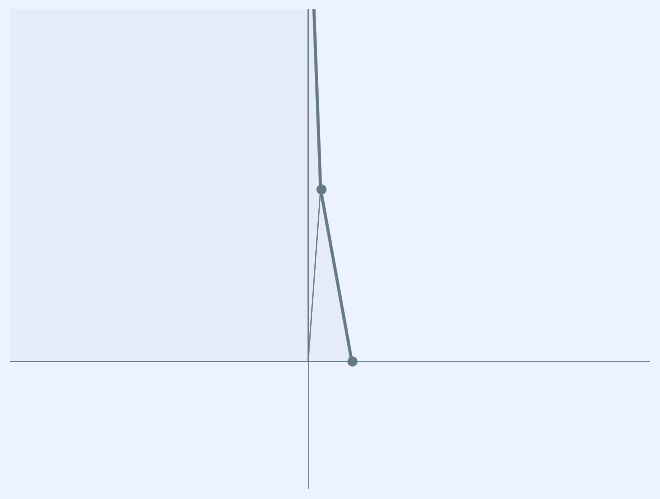

In [21]:
refresh_yybar()
yybar_plt.plot()

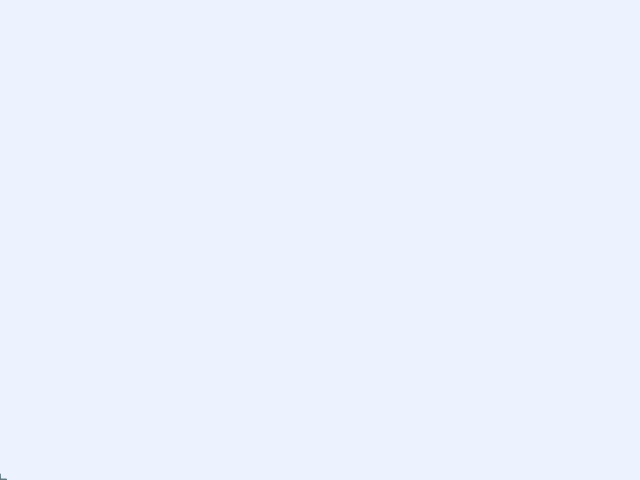

In [22]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, do_draw_rays=True, do_paraxial_layout=False)

In [23]:
pm.list_model()

           ax_ht        pr_ht       ax_slp       pr_slp         power          tau        index    type
 0:            0 -4.31034e+07      5.8e-10   0.00431034             0        1e+10      1.00000    dummy
 1:          5.8            0       -0.116   0.00431034          0.02           33     -1.00000    reflect
 2:        1.972     0.142241        -0.05   0.00907096   -0.03346856        39.44      1.00000    reflect
 3: -4.44089e-16          0.5        -0.05   0.00907096             0            0      1.00000    dummy


In [24]:
pm.first_order_data()

efl                 116
f                   116
f'                  116
ffl              -244.1
pp1              -128.1
bfl               39.44
ppk              -76.56
pp sep            18.56
f/#                  10
m             -1.16e-08
red          -8.621e+07
obj_dist          1e+10
obj_ang           0.247
enp_dist             -0
enp_radius          5.8
na obj          5.8e-10
n obj                 1
img_dist          39.44
img_ht              0.5
exp_dist         -15.68
exp_radius        2.756
na img            -0.05
n img                 1
optical invariant        0.025


In [25]:
vertex=2
pm.apply_ht_dgm_data(vertex, (0.2178/1.5, 2.25/1.5))
pm.paraxial_lens_to_seq_model()

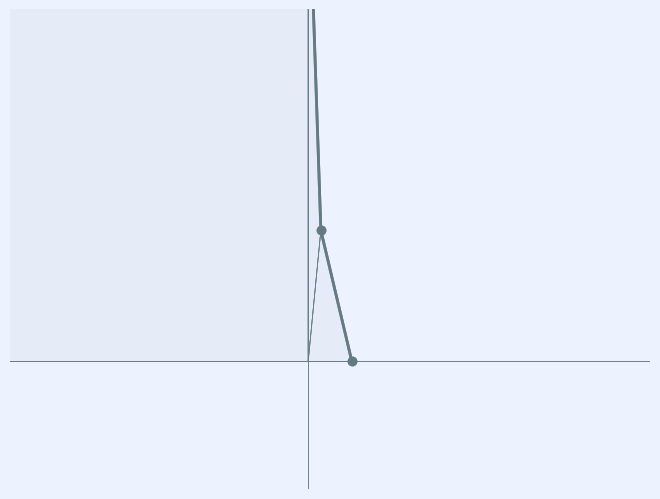

In [26]:
refresh_yybar()
yybar_plt.plot()

In [27]:
pm.list_model()

           ax_ht        pr_ht       ax_slp       pr_slp         power          tau        index    type
 0:            0 -4.31034e+07      5.8e-10   0.00431034             0        1e+10      1.00000    dummy
 1:          5.8            0    -0.127648   0.00431034    0.02200827      33.6864     -1.00000    reflect
 2:          1.5       0.1452        -0.05    0.0118267    -0.0517653           30      1.00000    reflect
 3: -8.88178e-16          0.5        -0.05    0.0118267             0            0      1.00000    dummy


In [28]:
pm.first_order_data()

efl                 116
f                   116
f'                  116
ffl              -318.3
pp1              -202.3
bfl                  30
ppk                 -86
pp sep            82.59
f/#                  10
m             -1.16e-08
red          -8.621e+07
obj_dist          1e+10
obj_ang           0.247
enp_dist             -0
enp_radius          5.8
na obj          5.8e-10
n obj                 1
img_dist             30
img_ht              0.5
exp_dist         -12.28
exp_radius        2.114
na img            -0.05
n img                 1
optical invariant        0.025


In [29]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1  4.3103e+07
    1:    -0.011004     -33.6864       air    reflect -1      5.8008
    2:    -0.025883      30.0000       air    reflect  1      1.6395
  Img:     0.000000      0.00000                       1     0.52515


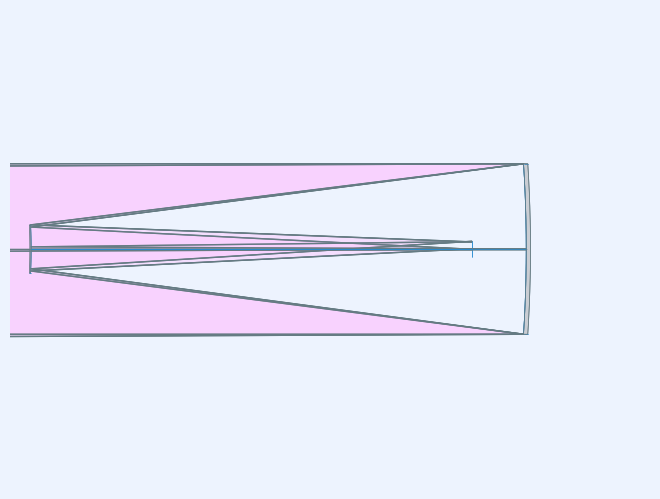

In [30]:
layout_plt.refresh()

In [31]:
opm.save_model('TwoMirror')

# Spherical Two Mirror

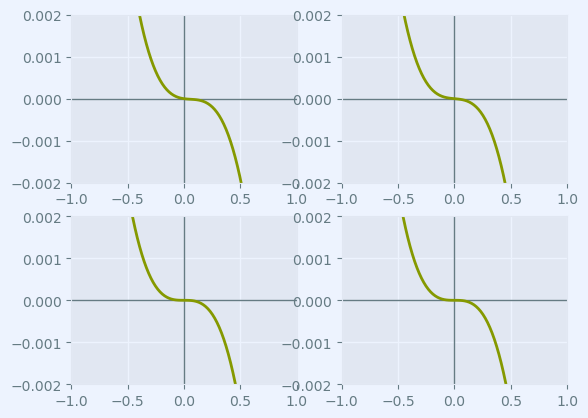

In [32]:
abr_plt.refresh()

In [33]:
# compute 3rd order aberrations
ax_ray, pr_ray, fod = ar['parax_data']
u_last = ax_ray[-1][mc.slp]
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
n_last = pm.sys[-1][mc.indx]
to_df = compute_third_order(opm)

tr_df=to_df.apply(to.seidel_to_transverse_aberration, axis='columns', args=(n_last,u_last))
out = widgets.Output()
wv_df=to_df.apply(to.seidel_to_wavefront, axis='columns', args=(central_wv,))
with out:
    display(to_df)
    display(wv_df)
display(out)

fcv=to.seidel_to_field_curv(to_df.loc['sum'], n_last, fod.opt_inv)

Output()

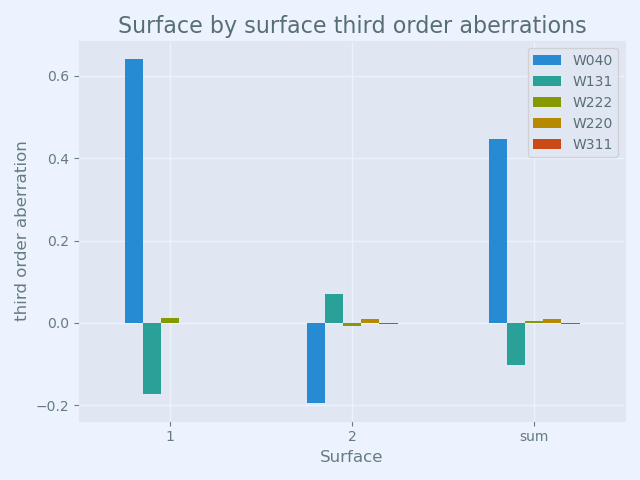

In [34]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

# Dall-Kirkham Two Mirror

In [35]:
apply_conics(opm, tcm.dall_kirkham, pm)

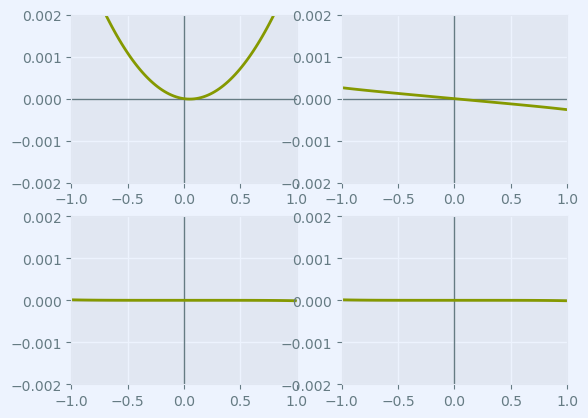

In [36]:
abr_plt.refresh()

In [37]:
opm.save_model('Dall_Kirkham')
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1 Surface(profile=Conic(c=-0.011004133919229532, cc=-0.6953002292080905), interact_mode='reflect')
2 Surface(profile=Conic(c=-0.02588265096102085, cc=0.0), interact_mode='reflect')
3 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')


In [38]:
listobj(sm)

0: Obj: dummy
profile: Spherical
c=0.0,   r=0.0
surface_od=43103448.27586207
t=10000000000.0 (+1);    medium: air

1: reflect
profile: Conic
c=-0.011004133919229532,   r=-90.87493912197101   conic cnst=-0.6953002292080905
surface_od=5.8007982633026165
t=-33.686400000000006 (-1);    medium: air

2: reflect
profile: Conic
c=-0.02588265096102085,   r=-38.63591876682165   conic cnst=0.0
surface_od=1.645598912718541
t=30.000000000000014 (+1);    medium: air

3: Img: dummy
profile: Spherical
c=0.0,   r=0.0
surface_od=0.504028231137533

do apertures: True


In [39]:
# compute 3rd order aberrations
ax_ray, pr_ray, fod = ar['parax_data']
u_last = ax_ray[-1][mc.slp]
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
n_last = pm.sys[-1][mc.indx]
to_df = compute_third_order(opm)

tr_df=to_df.apply(to.seidel_to_transverse_aberration, axis='columns', args=(n_last,u_last))
out = widgets.Output()
wv_df=to_df.apply(to.seidel_to_wavefront, axis='columns', args=(central_wv,))
with out:
    display(to_df)
    display(wv_df)
display(out)

fcv=to.seidel_to_field_curv(to_df.loc['sum'], n_last, fod.opt_inv)

Output()

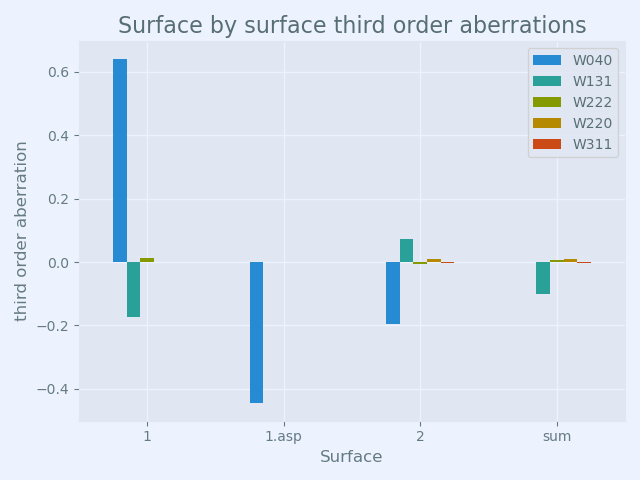

In [40]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

# Cassegrain Two Mirror

In [41]:
apply_conics(opm, tcm.cassegrain, pm)

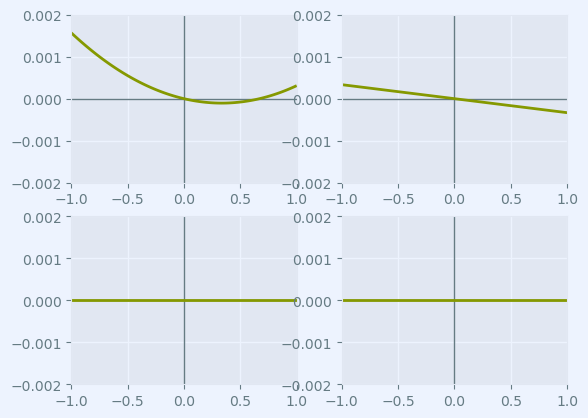

In [42]:
abr_plt.refresh()

In [43]:
opm.save_model('Cassegrain')
sm.list_surfaces()
sm.list_model()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1 Surface(profile=Conic(c=-0.011004133919229532, cc=-1.0), interact_mode='reflect')
2 Surface(profile=Conic(c=-0.02588265096102085, cc=-5.234321494406379), interact_mode='reflect')
3 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')
              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1  4.3103e+07
    1:    -0.011004     -33.6864       air    reflect -1      5.8008
    2:    -0.025883      30.0000       air    reflect  1      1.6483
  Img:     0.000000      0.00000                       1     0.50158


In [44]:
listobj(sm)

0: Obj: dummy
profile: Spherical
c=0.0,   r=0.0
surface_od=43103448.27586207
t=10000000000.0 (+1);    medium: air

1: reflect
profile: Conic
c=-0.011004133919229532,   r=-90.87493912197101   conic cnst=-1.0
surface_od=5.8007980153880885
t=-33.686400000000006 (-1);    medium: air

2: reflect
profile: Conic
c=-0.02588265096102085,   r=-38.63591876682165   conic cnst=-5.234321494406379
surface_od=1.6482759206143895
t=30.000000000000014 (+1);    medium: air

3: Img: dummy
profile: Spherical
c=0.0,   r=0.0
surface_od=0.5015831023379627

do apertures: True


In [45]:
# compute 3rd order aberrations
ax_ray, pr_ray, fod = ar['parax_data']
u_last = ax_ray[-1][mc.slp]
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
n_last = pm.sys[-1][mc.indx]
to_df = compute_third_order(opm)

tr_df=to_df.apply(to.seidel_to_transverse_aberration, axis='columns', args=(n_last,u_last))
out = widgets.Output()
wv_df=to_df.apply(to.seidel_to_wavefront, axis='columns', args=(central_wv,))
with out:
    display(to_df)
    display(wv_df)
display(out)

fcv=to.seidel_to_field_curv(to_df.loc['sum'], n_last, fod.opt_inv)

Output()

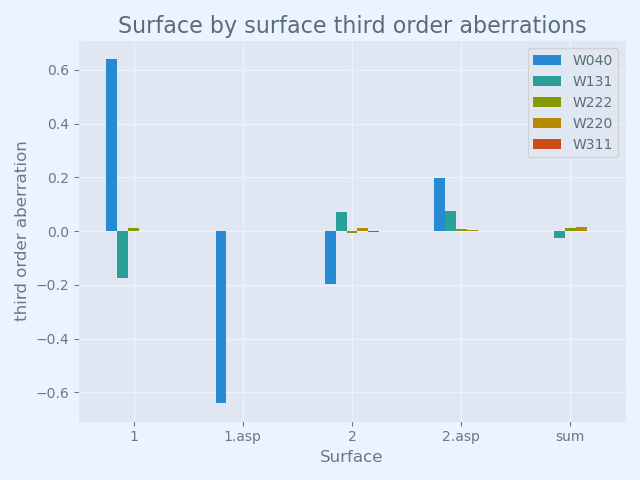

In [46]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

# Ritchey-Chretien Two Mirror

In [47]:
apply_conics(opm, tcm.ritchey_chretien, pm)

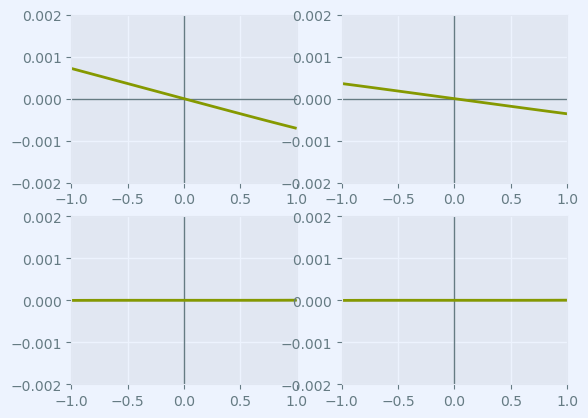

In [48]:
abr_plt.refresh()

In [49]:
opm.save_model('Ritchey_Chretien')
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1 Surface(profile=Conic(c=-0.011004133919229532, cc=-1.1070446826971212), interact_mode='reflect')
2 Surface(profile=Conic(c=-0.02588265096102085, cc=-7.073201392632837), interact_mode='reflect')
3 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')


In [50]:
listobj(sm)

0: Obj: dummy
profile: Spherical
c=0.0,   r=0.0
surface_od=43103448.27586207
t=10000000000.0 (+1);    medium: air

1: reflect
profile: Conic
c=-0.011004133919229532,   r=-90.87493912197101   conic cnst=-1.1070446826971212
surface_od=5.800797928365815
t=-33.686400000000006 (-1);    medium: air

2: reflect
profile: Conic
c=-0.02588265096102085,   r=-38.63591876682165   conic cnst=-7.073201392632837
surface_od=1.6492152040566173
t=30.000000000000014 (+1);    medium: air

3: Img: dummy
profile: Spherical
c=0.0,   r=0.0
surface_od=0.5007316863887187

do apertures: True


In [51]:
# compute 3rd order aberrations
ax_ray, pr_ray, fod = ar['parax_data']
u_last = ax_ray[-1][mc.slp]
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
n_last = pm.sys[-1][mc.indx]
to_df = compute_third_order(opm)

tr_df=to_df.apply(to.seidel_to_transverse_aberration, axis='columns', args=(n_last,u_last))
wv_df=to_df.apply(to.seidel_to_wavefront, axis='columns', args=(central_wv,))
fcv=to.seidel_to_field_curv(to_df.loc['sum'], n_last, fod.opt_inv)

out = widgets.Output()
with out:
    display(to_df)
    display(wv_df)
    display(fcv)
display(out)

Output()

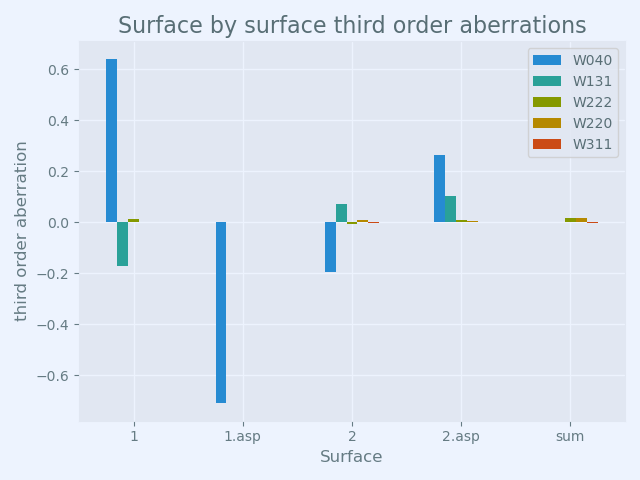

In [52]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

In [53]:
wv_df.loc[:, 'W040':'W131']

,W040,W131
1,6.416025e-01,-0.173322
1.asp,-7.102826e-01,-0.000000
2,-1.954961e-01,0.071033
2.asp,2.641763e-01,0.102289
sum,-1.259731e-08,0.000000


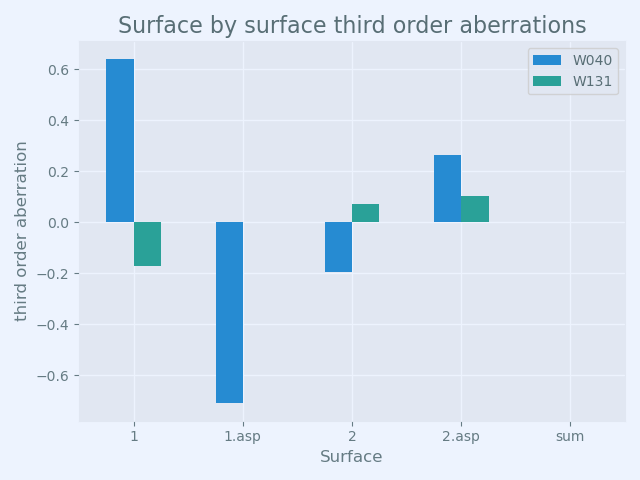

In [54]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.loc[:, 'W040':'W131'].plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

# Revert to Two Spherical Mirrors

In [55]:
apply_conics(opm, tcm.spheres, pm)
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1 Surface(profile=Conic(c=-0.011004133919229532, cc=0.0), interact_mode='reflect')
2 Surface(profile=Conic(c=-0.02588265096102085, cc=0.0), interact_mode='reflect')
3 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')


In [57]:
fo.list_parax_trace_fotr(opm)

stop surface: None
           y           u           n*i         ybar         ubar        n*ibar
 0            0      5.8e-10      5.8e-10 -4.31034e+07   0.00431034   0.00431034
 1          5.8     0.127648    -0.063824            0  -0.00431034   0.00431034
 2          1.5        -0.05    -0.088824       0.1452    0.0118267   0.00806851
 3 -8.88178e-16        -0.05        -0.05          0.5    0.0118267    0.0118267


In [58]:
from rayoptics.elem.profiles import mutate_profile

sm.ifcs[1].profile = mutate_profile(sm.ifcs[1].profile, 'Spherical')
sm.ifcs[2].profile = mutate_profile(sm.ifcs[2].profile, 'Spherical')

In [59]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1  4.3103e+07
    1:    -0.011004     -33.6864       air    reflect -1      5.8008
    2:    -0.025883      30.0000       air    reflect  1      1.6395
  Img:     0.000000      0.00000                       1     0.52515


In [61]:
fo.list_parax_trace_fotr(opm)

stop surface: None
           y           u           n*i         ybar         ubar        n*ibar
 0            0      5.8e-10      5.8e-10 -4.31034e+07   0.00431034   0.00431034
 1          5.8     0.127648    -0.063824            0  -0.00431034   0.00431034
 2          1.5        -0.05    -0.088824       0.1452    0.0118267   0.00806851
 3 -8.88178e-16        -0.05        -0.05          0.5    0.0118267    0.0118267


In [62]:
opm.save_model('TwoSphericalMirror')

found new profile in part_tree: M1.p
found new profile in part_tree: M2.p


In [63]:
pm.list_lens()

       ax_ray_ht    ax_ray_slp
 0:            0       5.8e-10
 1:          5.8     -0.127648
 2:          1.5         -0.05
 3: -8.88178e-16         -0.05

       pr_ray_ht    pr_ray_slp
 0: -4.31034e+07    0.00431034
 1:            0    0.00431034
 2:       0.1452     0.0118267
 3:          0.5     0.0118267

            power           tau        index    type
 0:             0         1e+10      1.00000    dummy
 1:    0.02200827        33.686     -1.00000    reflect
 2:    -0.0517653            30      1.00000    reflect
 3:             0             0      1.00000    dummy


In [64]:
pm.first_order_data()

efl                 116
f                   116
f'                  116
ffl              -318.3
pp1              -202.3
bfl                  30
ppk                 -86
pp sep            82.59
f/#                  10
m             -1.16e-08
red          -8.621e+07
obj_dist          1e+10
obj_ang           0.247
enp_dist             -0
enp_radius          5.8
na obj          5.8e-10
n obj                 1
img_dist             30
img_ht              0.5
exp_dist         -12.28
exp_radius        2.114
na img            -0.05
n img                 1
optical invariant        0.025


In [65]:
em.list_model()

0: Object (DummyInterface): Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1: M1 (Mirror): Mirror: Conic(c=-0.011004133919229532, cc=0.0), t=0.2900, sd=5.8008
2: M2 (Mirror): Mirror: Conic(c=-0.02588265096102085, cc=0.0), t=0.0820, sd=1.6395
3: Image (DummyInterface): Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')


In [66]:
pt.list_tree()

root
├── Object
│   └── p
│       └── i0
├── AG1
│   └── t
│       └── g0
├── M1
│   └── p
│       └── i1
├── AG2
│   └── t
│       └── g1
├── M2
│   └── p
│       └── i2
├── AG3
│   └── t
│       └── g2
└── Image
    └── p
        └── i3


In [67]:
opm_rc = open_model('Ritchey_Chretien.roa')

In [68]:
opm_rc['sm'].list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1  4.3103e+07
    1:    -0.011004     -33.6864       air    reflect -1      5.8008
    2:    -0.025883      30.0000       air    reflect  1      1.6492
  Img:     0.000000      0.00000                       1     0.50073


In [69]:
listobj(opm_rc['sm'].ifcs[1].profile)
listobj(opm_rc['sm'].ifcs[2].profile)

profile: Conic
c=-0.011004133919229532,   r=-90.87493912197101   conic cnst=-1.1070446826971212

profile: Conic
c=-0.02588265096102085,   r=-38.63591876682165   conic cnst=-7.073201392632837



In [70]:
listobj(sm)

0: Obj: dummy
profile: Spherical
c=0.0,   r=0.0
surface_od=43103448.27586207
t=10000000000.0 (+1);    medium: air

1: reflect
profile: Spherical
c=-0.011004133919229532,   r=-90.87493912197101
surface_od=5.800798830179506
t=-33.686400000000006 (-1);    medium: air

2: reflect
profile: Spherical
c=-0.02588265096102085,   r=-38.63591876682165
surface_od=1.639494860523097
t=30.000000000000014 (+1);    medium: air

3: Img: dummy
profile: Spherical
c=0.0,   r=0.0
surface_od=0.5251472703285189

do apertures: True


In [71]:
[f" ({int(zdir):+})" for zdir in sm.z_dir]

[' (+1)', ' (-1)', ' (+1)']